# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [76]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)

inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [77]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [11]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [3]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('./img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('./img/image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

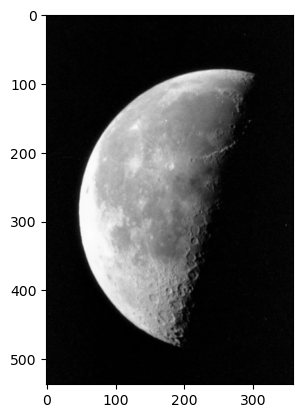

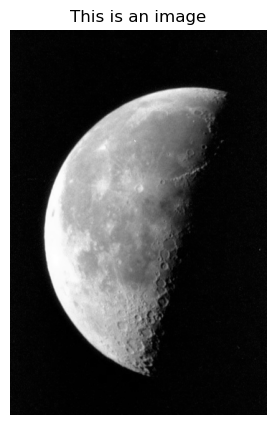

In [5]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage, vmin = 0, vmax = 255)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercice 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic, and not ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [17]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    myimage = np.array(Image.open(fname))
    return myimage

result = openImage('img/moon.png')
print('Image: ', result)

Image:  [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    count=0
    for pixel1 in I:
        for pixel2 in pixel1:
            if(pixel2 == k):
                count = count + 1
    return count

def countPixels(I,k):
    """ Array*int -> int"""
    return (I==k).sum()

result_count = countPixels(result, 3)
print('Total number of pixels:' ,result_count)

Total number of pixels: 25408


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

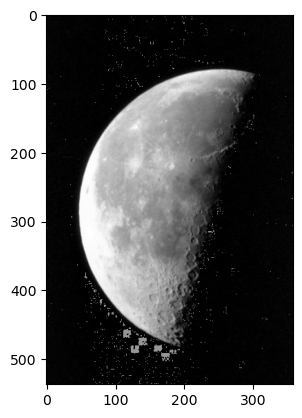

In [18]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    shape = I.shape
    for i in range (shape[0]):
        for j in range(shape[1]):
            if(I[i][j] == k1):
                I[i][j] = k2
    return I

def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    a = np.array(I)
    return np.where(a==k1, k2, a)

result_replace = replacePixels(result, 0, 150)
plt.imshow(result_replace)
plt.show()

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

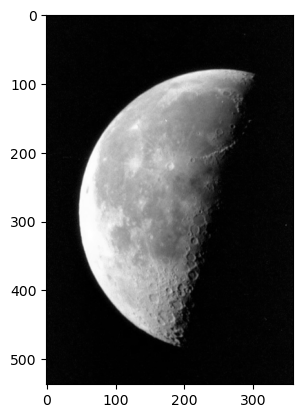

Normalized Image:  [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


In [63]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    a = np.array(I)
    d = k2-k1
    d_arr = np.max(a)-np.min(a)
    return (((a-np.min(a))*d)/d_arr)+k1

result = openImage('img/moon.png')
plt.imshow(normalizeImage(result, 0, 1))
plt.show()
print('Normalized Image: ', result)

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

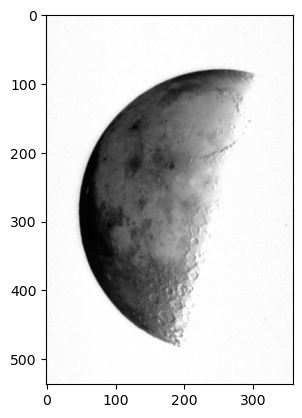

Inverted Image:  [[254 252 248 ... 247 239 247]
 [252 248 252 ... 251 244 243]
 [249 251 249 ... 248 253 252]
 ...
 [251 247 247 ... 249 251 247]
 [251 247 247 ... 251 249 249]
 [253 252 252 ... 249 246 246]]


In [21]:
def inverteImage(I):
    """ Array -> Array """
    shape = I.shape
    result = I

    for i in range (shape[0]):
        for j in range(shape[1]):
            result[i][j] = 255 - result[i][j]
    return result

result = openImage('img/moon.png')
new = inverteImage(result)
plt.imshow(new)
plt.show()
print('Inverted Image: ', new)

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [27]:
def computeHistogram(I):
    """ Array -> list[int] """
    a = np.array(I)
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T


# use comments to answer to a verbal question
result = openImage('img/moon.png')
histogram = computeHistogram(result)
print('Histogram: ', histogram)

Histogram:  [[    0  1459]
 [    1 20126]
 [    2 30924]
 [    3 25408]
 [    4 17167]
 [    5 11368]
 [    6  7369]
 [    7  4767]
 [    8  3213]
 [    9  2178]
 [   10  1486]
 [   11   993]
 [   12   632]
 [   13   488]
 [   14   371]
 [   15   301]
 [   16   255]
 [   17   217]
 [   18   201]
 [   19   202]
 [   20   190]
 [   21   165]
 [   22   168]
 [   23   140]
 [   24   160]
 [   25   157]
 [   26   129]
 [   27   136]
 [   28   140]
 [   29   135]
 [   30   137]
 [   31   121]
 [   32   137]
 [   33   114]
 [   34   127]
 [   35   129]
 [   36   115]
 [   37   132]
 [   38   123]
 [   39   124]
 [   40   101]
 [   41    91]
 [   42   122]
 [   43   116]
 [   44   129]
 [   45   109]
 [   46   108]
 [   47   116]
 [   48   113]
 [   49   123]
 [   50   109]
 [   51   140]
 [   52   101]
 [   53   109]
 [   54   114]
 [   55   117]
 [   56   140]
 [   57   127]
 [   58   140]
 [   59   142]
 [   60   129]
 [   61   134]
 [   62   192]
 [   63   160]
 [   64   179]
 [   65   165

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

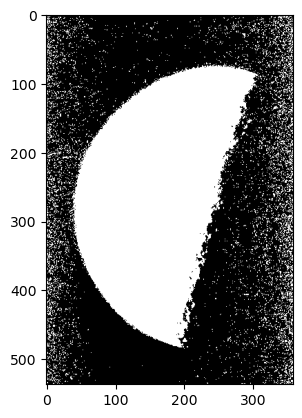

Thresholded Image: [[  0   0 255 ... 255 255 255]
 [  0 255   0 ...   0 255 255]
 [  0   0   0 ... 255   0   0]
 ...
 [  0 255 255 ...   0   0 255]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0 255 255]]


In [28]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    a = np.array(I)
    return np.where(a<s, 0, 255)

result_thresh = thresholdImage(result, 7)
plt.imshow(result_thresh)
plt.show()
print('Thresholded Image:', result_thresh)

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

Image: 


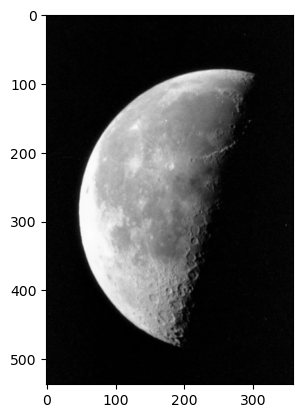

Histogram: 


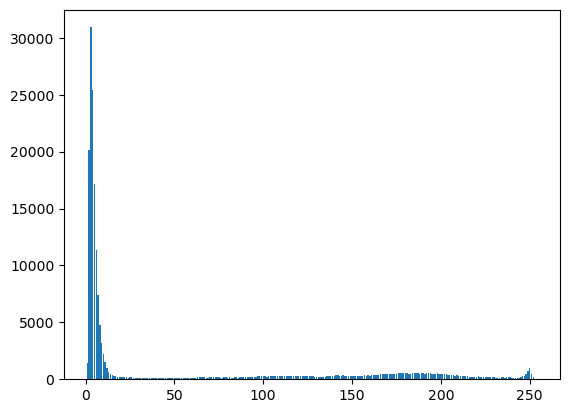

Inverted Image: 


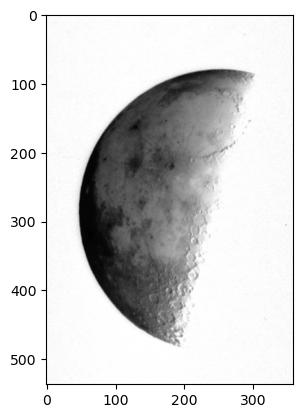

Inverted Histogram: 


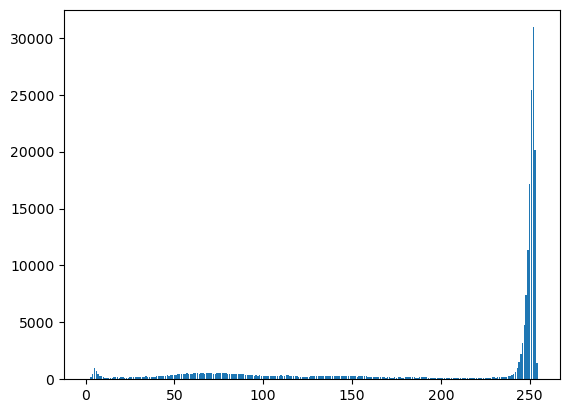

In [32]:
import matplotlib.pyplot as plt

## your code start below

# Displaying the image
print('Image: ')
moon_1 = openImage('img/moon.png')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
plt.show()


# Computing the histogram 
moonHist = computeHistogram(moon_1)
moonFreq = np.delete(moonHist, 0, axis=1)
x = np.arange(1,255,1)
y = moonFreq.flatten()

# Plot the histogram 
print('Histogram: ')
plt.bar(x, y)
plt.show()

# Displaying the inverted image
print('Inverted Image: ')
moon_inverted = inverteImage(moon_1)
plt.imshow(moon_inverted, cmap = 'gray', vmin=0, vmax=255)
plt.show()

# Computing the inverted histogram
moonHist_inverted = computeHistogram(moon_inverted)
moonFreq_inverted = np.delete(moonHist_inverted, 0, axis=1)
x1 = np.arange(1,255,1)
y_inverted = moonFreq_inverted.flatten()


# Plot the inverted histogram 
print('Inverted Histogram: ')
y1 = y_inverted
plt.bar(x1, y1)
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

Original Image: 


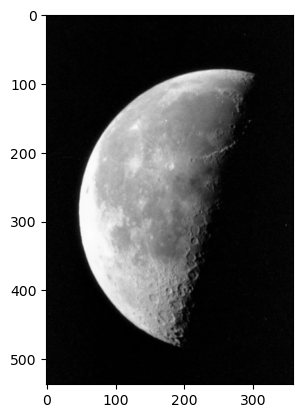

Normalized image array:  [[10.15810277 10.4743083  10.09486166 ... 10.25296443 10.50592885
  10.25296443]
 [10.4743083  10.09486166 10.4743083  ... 10.63241107 10.72727273
  10.88537549]
 [10.9486166  10.63241107 10.9486166  ... 10.09486166 10.31620553
  10.4743083 ]
 ...
 [10.63241107 10.25296443 10.25296443 ... 10.9486166  10.63241107
  10.25296443]
 [10.63241107 10.25296443 10.25296443 ... 10.63241107 10.9486166
  10.9486166 ]
 [10.31620553 10.4743083  10.4743083  ... 10.9486166  10.41106719
  10.41106719]]

Normalized Image: 


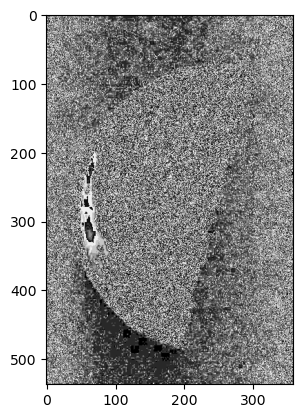

Normalized Histogram:  [[1.00000000e+01 3.37300000e+03]
 [1.00316206e+01 2.43100000e+03]
 [1.00632411e+01 2.31300000e+03]
 [1.00948617e+01 6.65400000e+03]
 [1.01264822e+01 2.00700000e+03]
 [1.01581028e+01 2.20050000e+04]
 [1.01897233e+01 2.28700000e+03]
 [1.02213439e+01 1.95900000e+03]
 [1.02529644e+01 5.02200000e+03]
 [1.02845850e+01 2.04100000e+03]
 [1.03162055e+01 3.28040000e+04]
 [1.03478261e+01 2.13900000e+03]
 [1.03794466e+01 1.92000000e+03]
 [1.04110672e+01 4.13100000e+03]
 [1.04426877e+01 2.09800000e+03]
 [1.04743083e+01 2.72870000e+04]
 [1.05059289e+01 2.17900000e+03]
 [1.05375494e+01 1.87000000e+03]
 [1.05691700e+01 3.37000000e+03]
 [1.06007905e+01 2.22200000e+03]
 [1.06324111e+01 1.89970000e+04]
 [1.06640316e+01 2.11500000e+03]
 [1.06956522e+01 1.90600000e+03]
 [1.07272727e+01 2.87200000e+03]
 [1.07588933e+01 2.51700000e+03]
 [1.07905138e+01 1.32650000e+04]
 [1.08221344e+01 2.00200000e+03]
 [1.08537549e+01 1.80200000e+03]
 [1.08853755e+01 2.54500000e+03]
 [1.09169960e+01 2.7

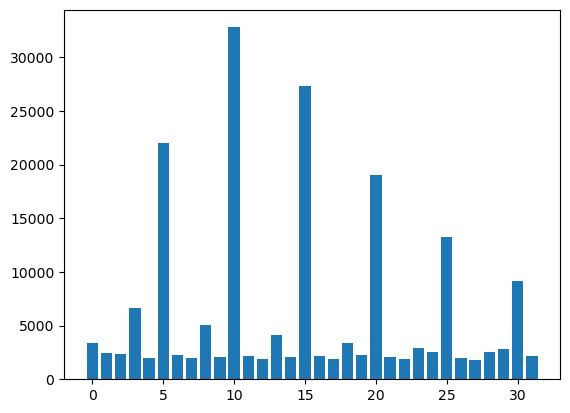

In [69]:
#Original Image
print('Original Image: ')
moon_1 = openImage('img/moon.png')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
plt.show()

#Normalized Image
normImageArray = normalizeImage(moon_1, 10, 50)
print('Normalized image array: ', normImageArray)
print('\nNormalized Image: ')
plt.imshow(normImageArray)
plt.show()

#Normalized Histogram
unique, counts = np.unique(normImageArray, return_counts=True)
b = np.asarray((unique, counts)).T
print('Normalized Histogram: ', b)
c = np.delete(b, 0, axis=1)
x = range(0,32)
d = c.flatten()
y = d

#Plot Normalized Histogram
print('\nNormalized Histogram:')
plt.bar(x, y)
plt.show()

10. Same question than 9. replacing the normalization by a thresholding with parameter $s=127$.

Original Image: 


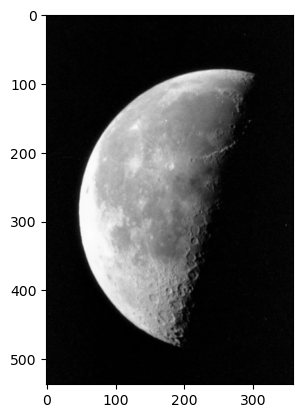

Histogram: 


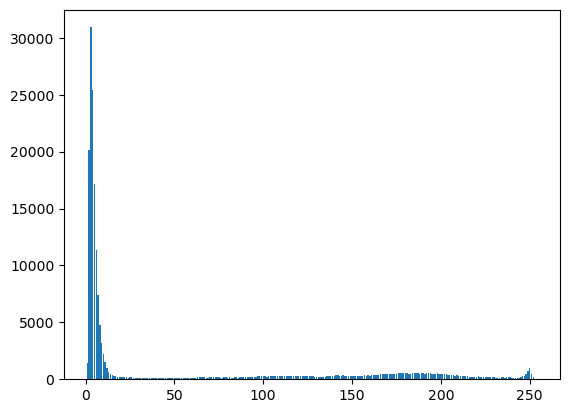

Thresholded Image: 


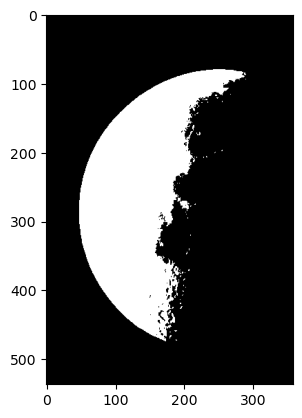

Histogram Array:  [149110  43136]
Histogram: 


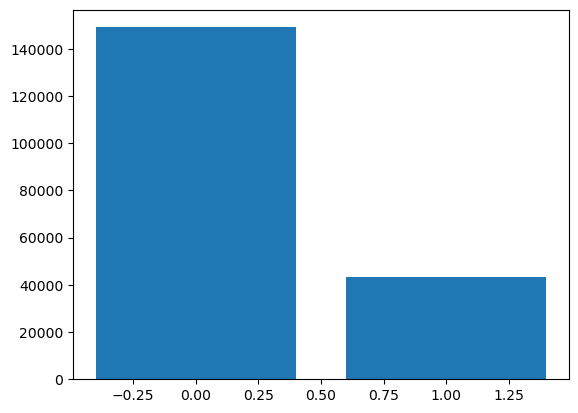

In [70]:
import matplotlib.pyplot as plt

#Original Image
moon_1 = openImage('img/moon.png')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
print('Original Image: ')
plt.show()

#Original Histogram
moonHist = computeHistogram(moon_1)
moonFreq = np.delete(moonHist, 0, axis=1)
x3 = np.arange(1,255,1)
newMoon = moonFreq.flatten()
y3 = newMoon
print('Histogram: ')
plt.bar(x3, y3)
plt.show()

#Threshold Image
imThres=thresholdImage(moon_1, 127)
plt.imshow(imThres, cmap = 'gray', vmin=0, vmax=255)
print('Thresholded Image: ')
plt.show()

#Histogram Array
unique7, counts7 = np.unique(np.around(imThres, decimals =3), return_counts=True)
thres = np.asarray((unique7, counts7)).T
thresDel = np.delete(thres, 0, axis=1)
final = thresDel.flatten()
print('Histogram Array: ', final)

#Plot Histogram
x44 = np.arange(2)
y44 = final
print('Histogram: ')
plt.bar(x44, y44)
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 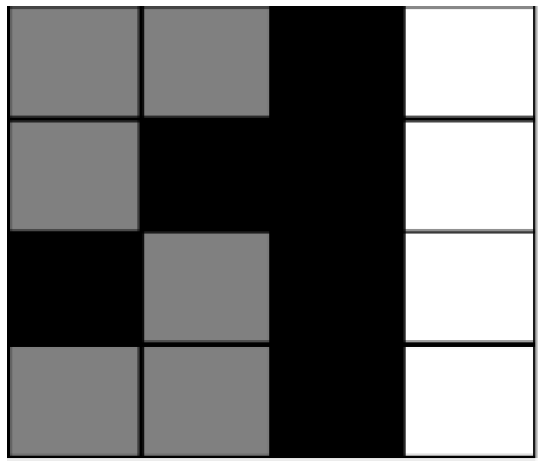 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

Original Image: 


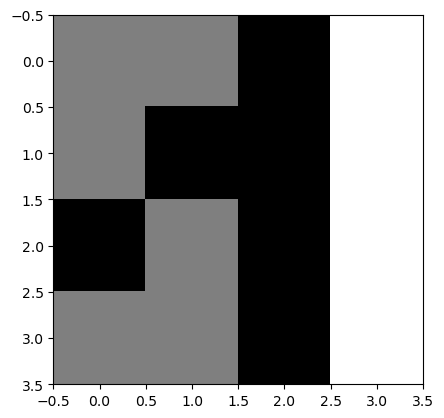

Histogram:


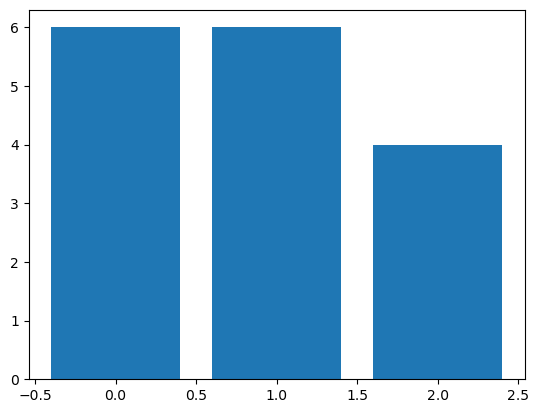

In [80]:
#Original Image
print('Original Image: ')
image = np.array([(127, 127, 0, 255),
                (127, 0, 0, 255),
                (0, 127, 0, 255),
                (127, 127, 0, 255)])
plt.imshow(image)
plt.show()


# Computing the histogram
hist = computeHistogram(image)
Freq = np.delete(hist, 0, axis=1)
y = Freq.flatten()
x = np.arange(0,len(y))

# Plot the histogram 
print('Histogram:')
plt.bar(x,y)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

Image 1: 


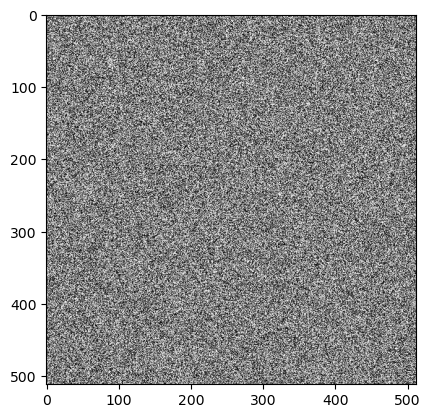

Histogram Image 1:


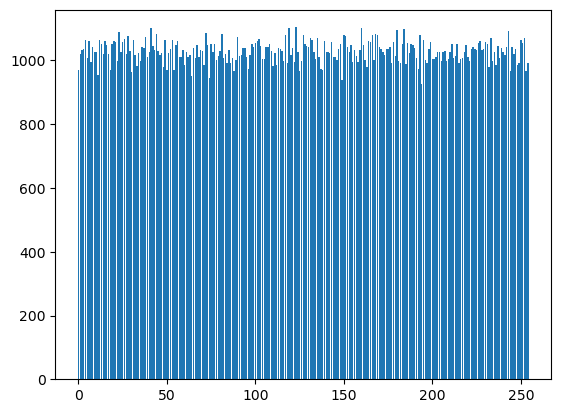

Image 2: 


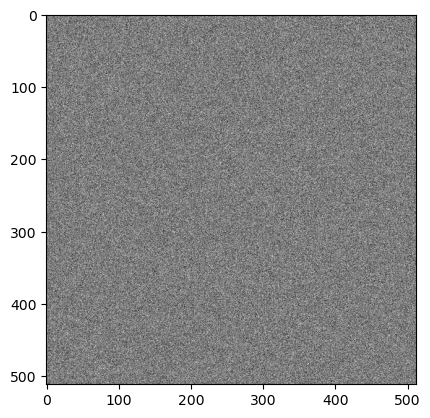

Histogram Image 2:


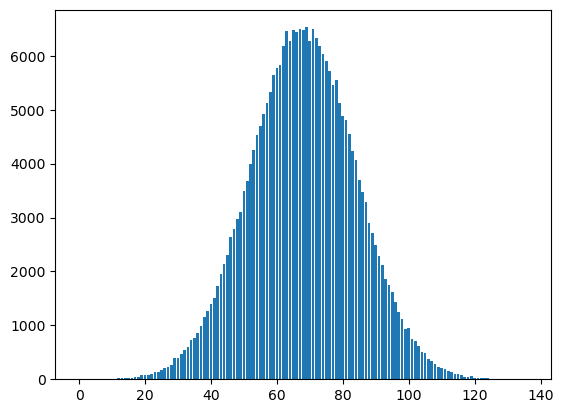

In [81]:
import numpy.matlib

#Image 1
print('Image 1: ')
image_rand = np.random.randint(0, 255, size=(512,512), dtype='int')
plt.imshow(image_rand)
plt.show()

#Histogram 1
print('Histogram Image 1:')
histUni =  computeHistogram(image_rand)
Freq = np.delete(histUni, 0, axis=1)
y = Freq.flatten()
x = np.arange(0, len(y))
plt.bar(x,y)
plt.show()

#Image 2
print('Image 2: ')
s = np.around(np.random.normal(loc = 128, scale=16, size=(512,512) ), decimals =0)
plt.imshow(s)
plt.show()

#Histogram 2
print('Histogram Image 2:')
histNorm = computeHistogram(s)
FreqN = np.delete(histNorm, 0, axis=1)
y2 = FreqN.flatten()
x2 = np.arange(0,len(y2))
plt.bar(x2,y2)
plt.show()

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

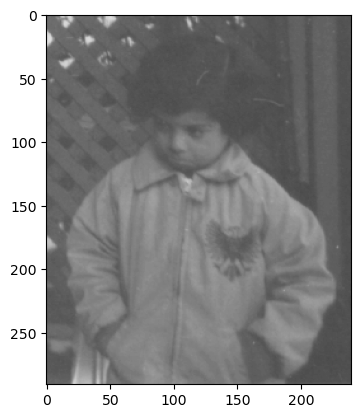

In [83]:
pout = openImage('img/pout.png')
plt.imshow(pout, cmap = 'gray', vmin=0, vmax=255)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

In [84]:
pout = openImage('img/pout.png')

# Computing the histogram 
print('Histogram:')
print(computeHistogram(pout))

#maximum
print('The maximum is:')
print(np.max(pout))
#minimum
print('The minimum is:')
print(np.min(pout))

Histogram:
[[  74    2]
 [  75   38]
 [  77  389]
 [  78 1245]
 [  80 1518]
 [  82 3628]
 [  83 3146]
 [  84 2041]
 [  86 1601]
 [  87 2415]
 [  89 1684]
 [  91 1506]
 [  93 1813]
 [  94 1660]
 [  95 1390]
 [  97 1572]
 [  98 2662]
 [  99 1761]
 [ 101 1387]
 [ 102 1218]
 [ 103 1287]
 [ 105 1308]
 [ 106 1288]
 [ 107 1068]
 [ 108  732]
 [ 109  639]
 [ 110  559]
 [ 112  575]
 [ 113  504]
 [ 114  502]
 [ 116  518]
 [ 117  476]
 [ 119  490]
 [ 120  599]
 [ 121 1263]
 [ 122  686]
 [ 123  708]
 [ 125  724]
 [ 126  804]
 [ 127  957]
 [ 128 2770]
 [ 130 1200]
 [ 131  973]
 [ 132 1004]
 [ 133 2434]
 [ 134 1087]
 [ 136  892]
 [ 137 1737]
 [ 138  995]
 [ 139  813]
 [ 142 1459]
 [ 143  723]
 [ 144  576]
 [ 145  512]
 [ 146  448]
 [ 147  431]
 [ 148  377]
 [ 149  600]
 [ 150  296]
 [ 151  266]
 [ 153  354]
 [ 154  154]
 [ 155  121]
 [ 156  113]
 [ 157  113]
 [ 158   91]
 [ 159  163]
 [ 160   58]
 [ 161   53]
 [ 162   50]
 [ 163   51]
 [ 164   67]
 [ 166   20]
 [ 167   21]
 [ 169   36]
 [ 170   10]
 

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

In [86]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    num_pixels = np.sum(h)
    histogram_array = h/num_pixels
    chistogram_array = np.cumsum(histogram_array)

    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

    img_list = list(I.flatten())
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list), I.shape)

    return eq_img_array

Image Equalized: 


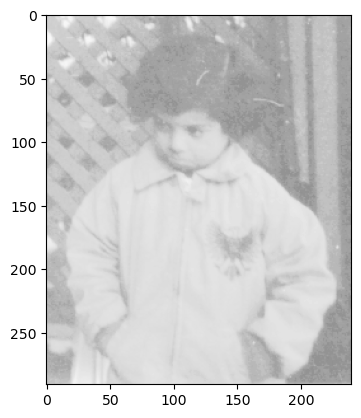

In [93]:
print('Image Equalized: ')
hist = computeHistogram(pout)
pout_new = histogramEqualization(pout, hist)
plt.imshow(pout_new, vmin=0, vmax=255)
plt.show()

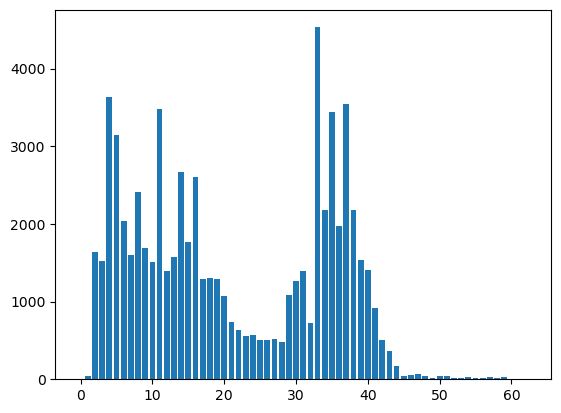

In [91]:
histNorm = computeHistogram(pout_new)
FreqN = np.delete(histNorm, 0, axis=1)
y2 = FreqN.flatten()
x2 = np.arange(0,len(y2))
plt.bar(x2,y2)
plt.show()